In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import pandas as pd
import pathlib
import seaborn as sns
import numpy as np
import squidpy as sq

%load_ext lab_black
%load_ext autoreload
%autoreload 2

In [2]:
BASE_PATH = pathlib.Path(
    "/storage/groups/ml01/datasets/raw/20201214_SquidpyData_giovanni.palla/starmap/giotto_raw"
)
DATA_PATH = ""

In [3]:
counts = pd.read_csv(
    BASE_PATH / "count_matrix/STARmap_3D_data_expression.txt",
    index_col=0,
    delimiter="\t",
)

In [4]:
metadata = pd.read_csv(
    BASE_PATH / "cell_locations/STARmap_3D_data_cell_locations.txt",
    delimiter="\t",
    header=None,
)
metadata.columns = ["x", "y", "z"]

In [5]:
metadata.x.max()

1810

In [6]:
metadata.y.max()

1536

In [7]:
metadata.z.max()

94

In [8]:
np.testing.assert_array_equal(metadata.index.values, counts.T.index.values)

AssertionError: 
Arrays are not equal

Mismatched elements: 33598 / 33598 (100%)
 x: array([    0,     1,     2, ..., 33595, 33596, 33597])
 y: array(['cell_1', 'cell_2', 'cell_3', ..., 'cell_33596', 'cell_33597',
       'cell_33598'], dtype=object)

In [9]:
counts = counts.T.copy()
counts.reset_index(inplace=True, drop=True)
metadata.reset_index(inplace=True, drop=True)

In [10]:
from anndata import AnnData
import scipy

genes = counts.columns.values
counts = scipy.sparse.csr_matrix(counts.to_numpy())
counts.eliminate_zeros()
adata = AnnData(counts, obs=metadata)

/home/icb/giovanni.palla/miniconda3/envs/spatial/lib/python3.8/site-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [11]:
adata.var_names = genes

In [12]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
adata.raw = adata
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata)

/home/icb/giovanni.palla/miniconda3/envs/spatial/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:182: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


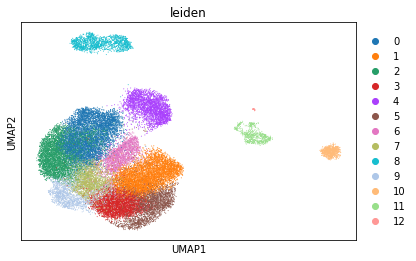

In [13]:
sc.pl.umap(adata, color="leiden")

In [14]:
adata.obsm["spatial"] = adata.obs[["x", "y", "z"]].to_numpy()

In [15]:
sq.gr.spatial_neighbors(adata, coord_type="generic")

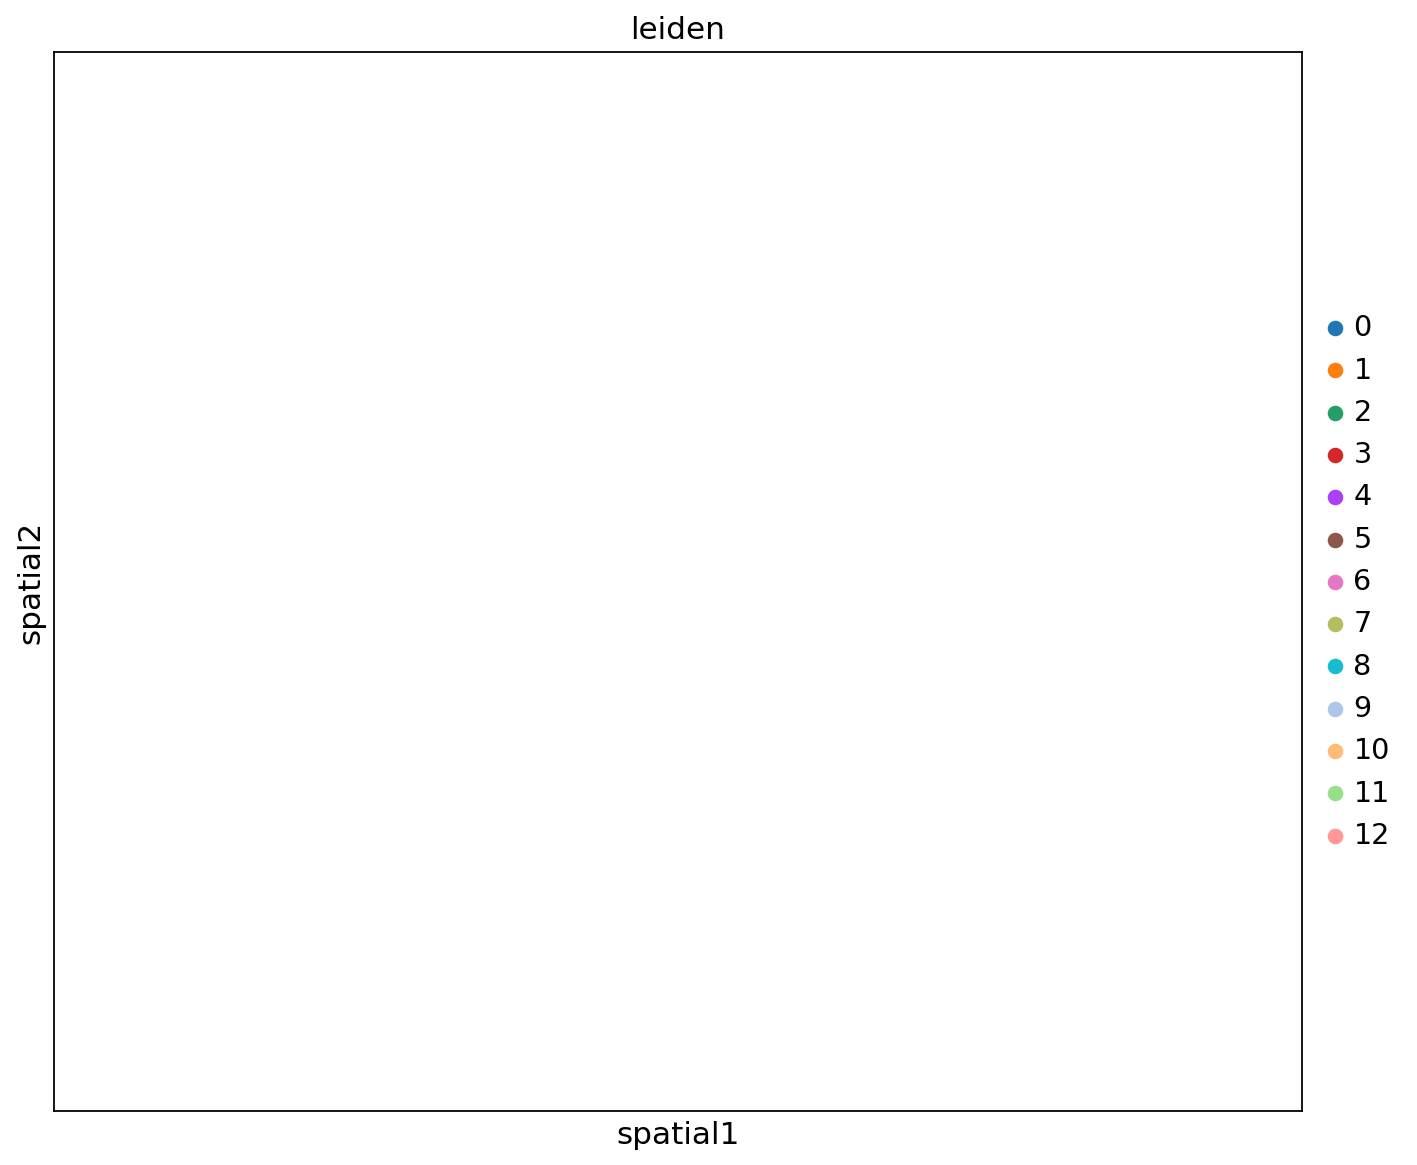

In [20]:
sc.set_figure_params(figsize=(10, 10))
sc.pl.spatial(adata, color="leiden", spot_size=0)

In [21]:
adata

AnnData object with n_obs × n_vars = 33598 × 28
    obs: 'x', 'y', 'z', 'leiden'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'spatial_neighbors', 'leiden_nhood_enrichment'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'distances', 'connectivities', 'spatial_connectivities', 'spatial_distances'

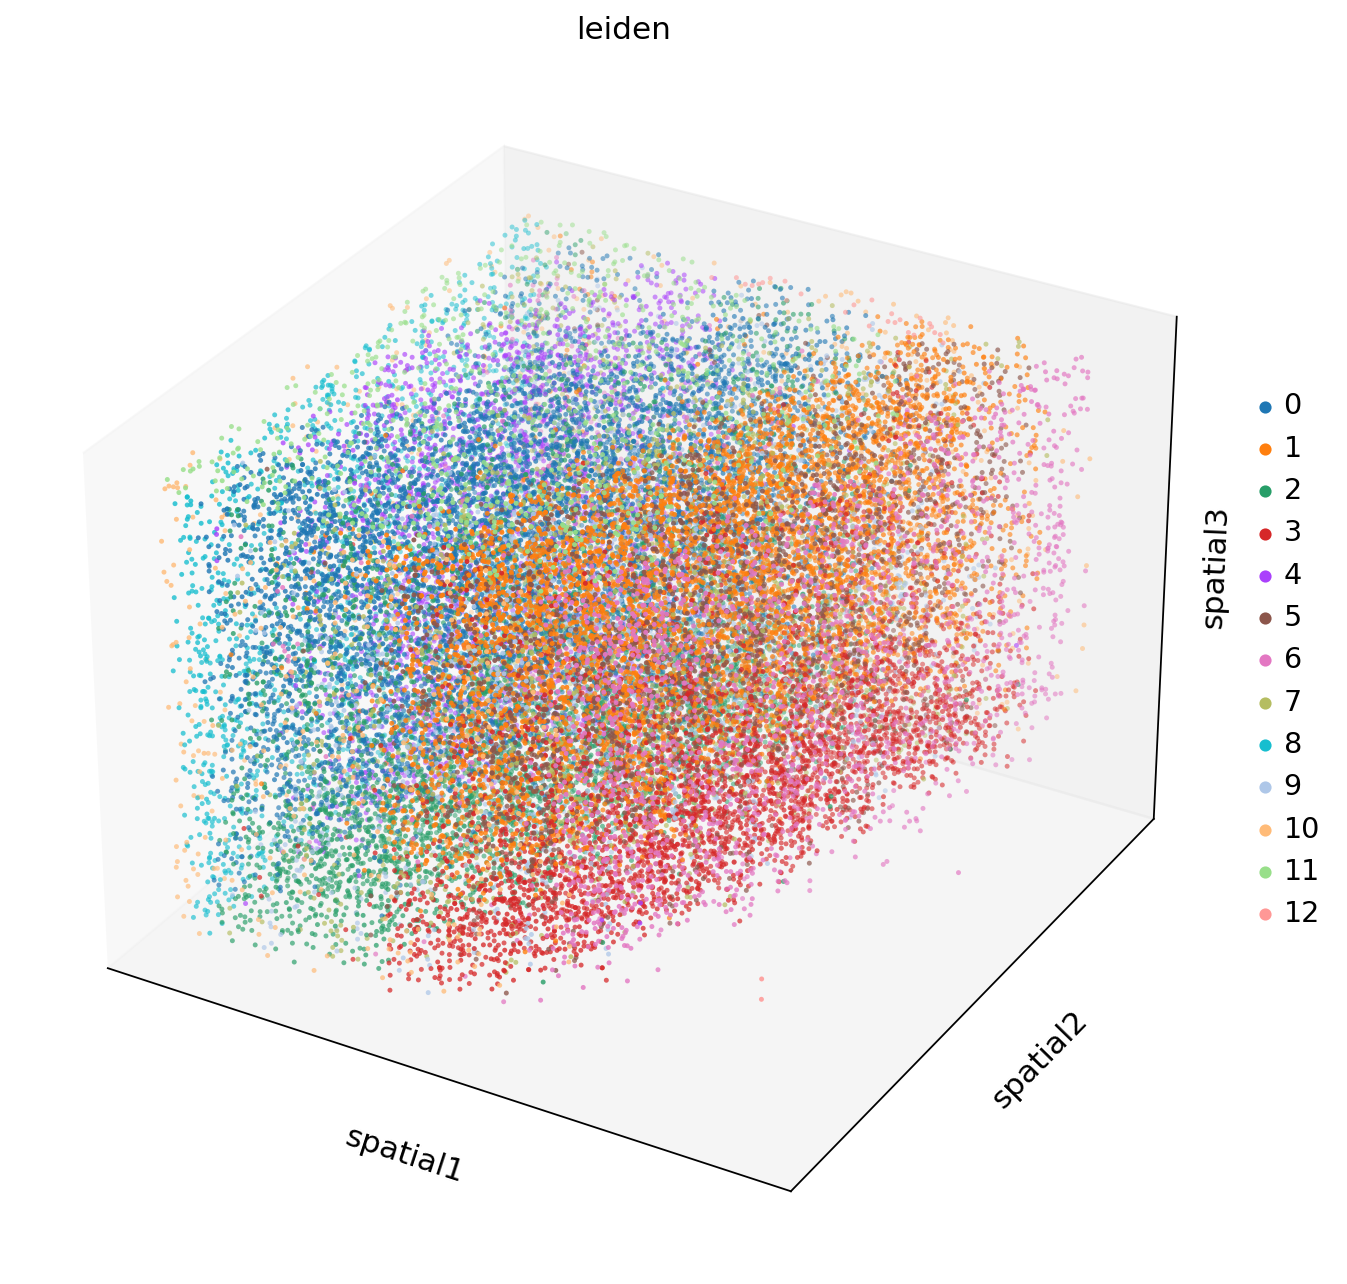

In [17]:
sc.pl.embedding(adata, basis="spatial", color="leiden", projection="3d")

In [18]:
sq.gr.spatial_neighbors(adata, coord_type="generic", delaunay=True)

In [19]:
sq.gr.nhood_enrichment(adata, cluster_key="leiden")

  0%|          | 0/1000 [00:00<?, ?/s]

ValueError: 'vertices' must be 2D with shape (M, 2). Your input has shape (2, 3).

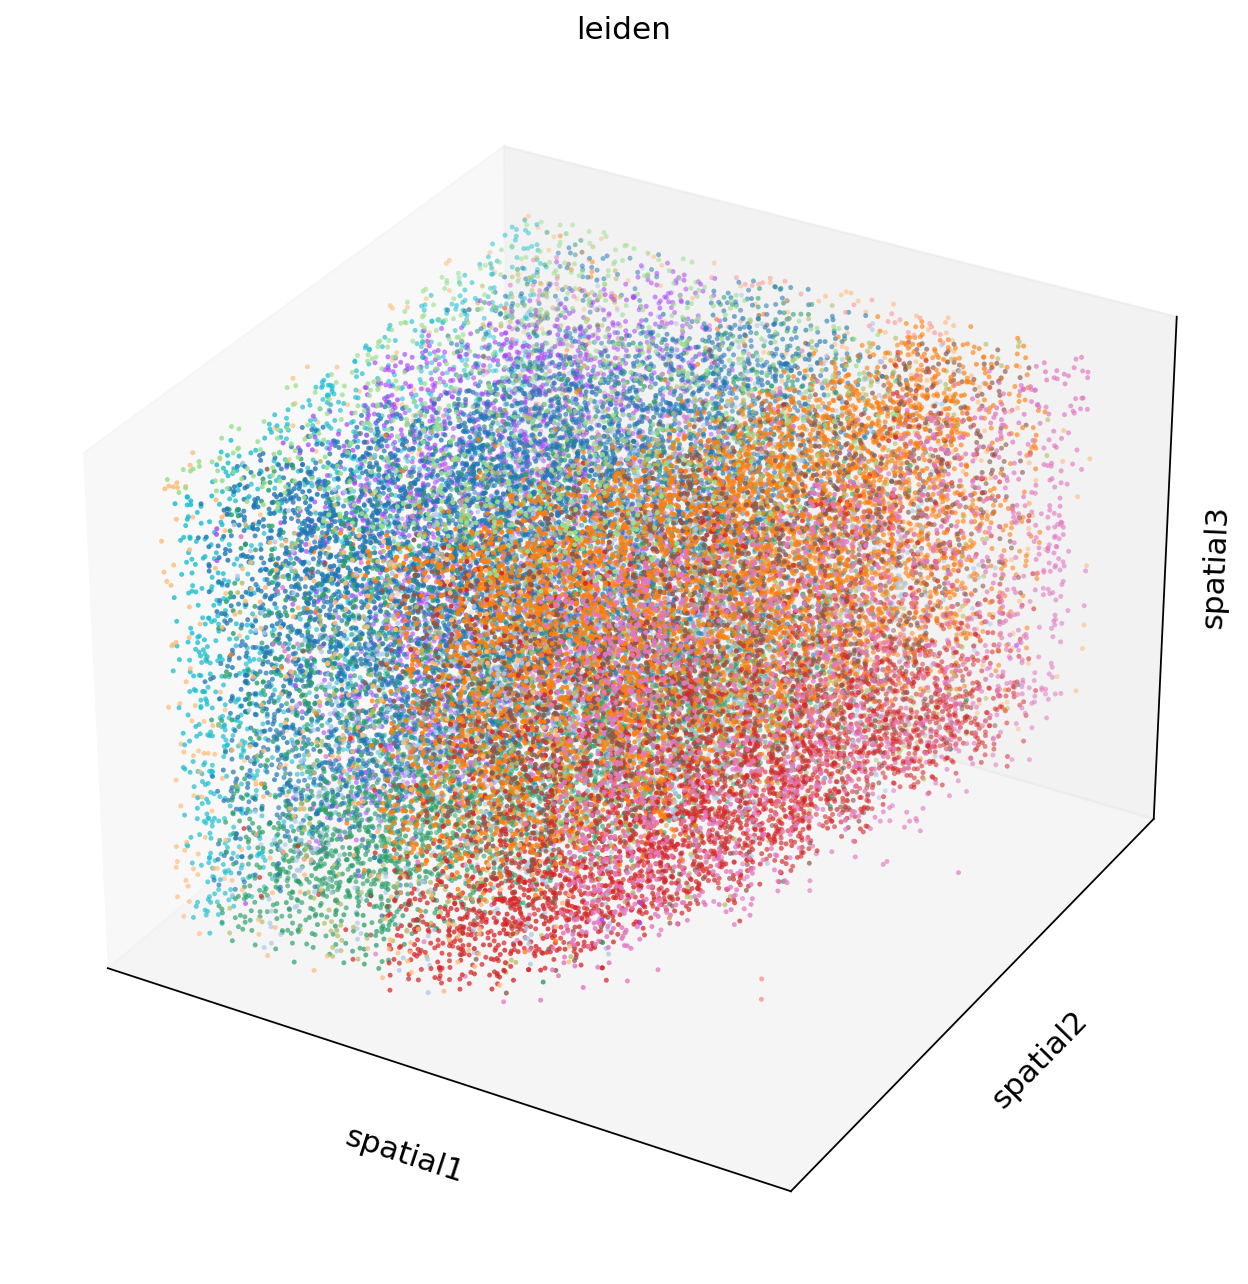

In [22]:
sc.pl.embedding(adata, basis="spatial", color="leiden", projection="3d", edges=True, edges_width=1, neighbors_key="spatial_neighbors")

NotImplementedError: Axes3D currently only supports the aspect argument 'auto'. You passed in 'equal'.

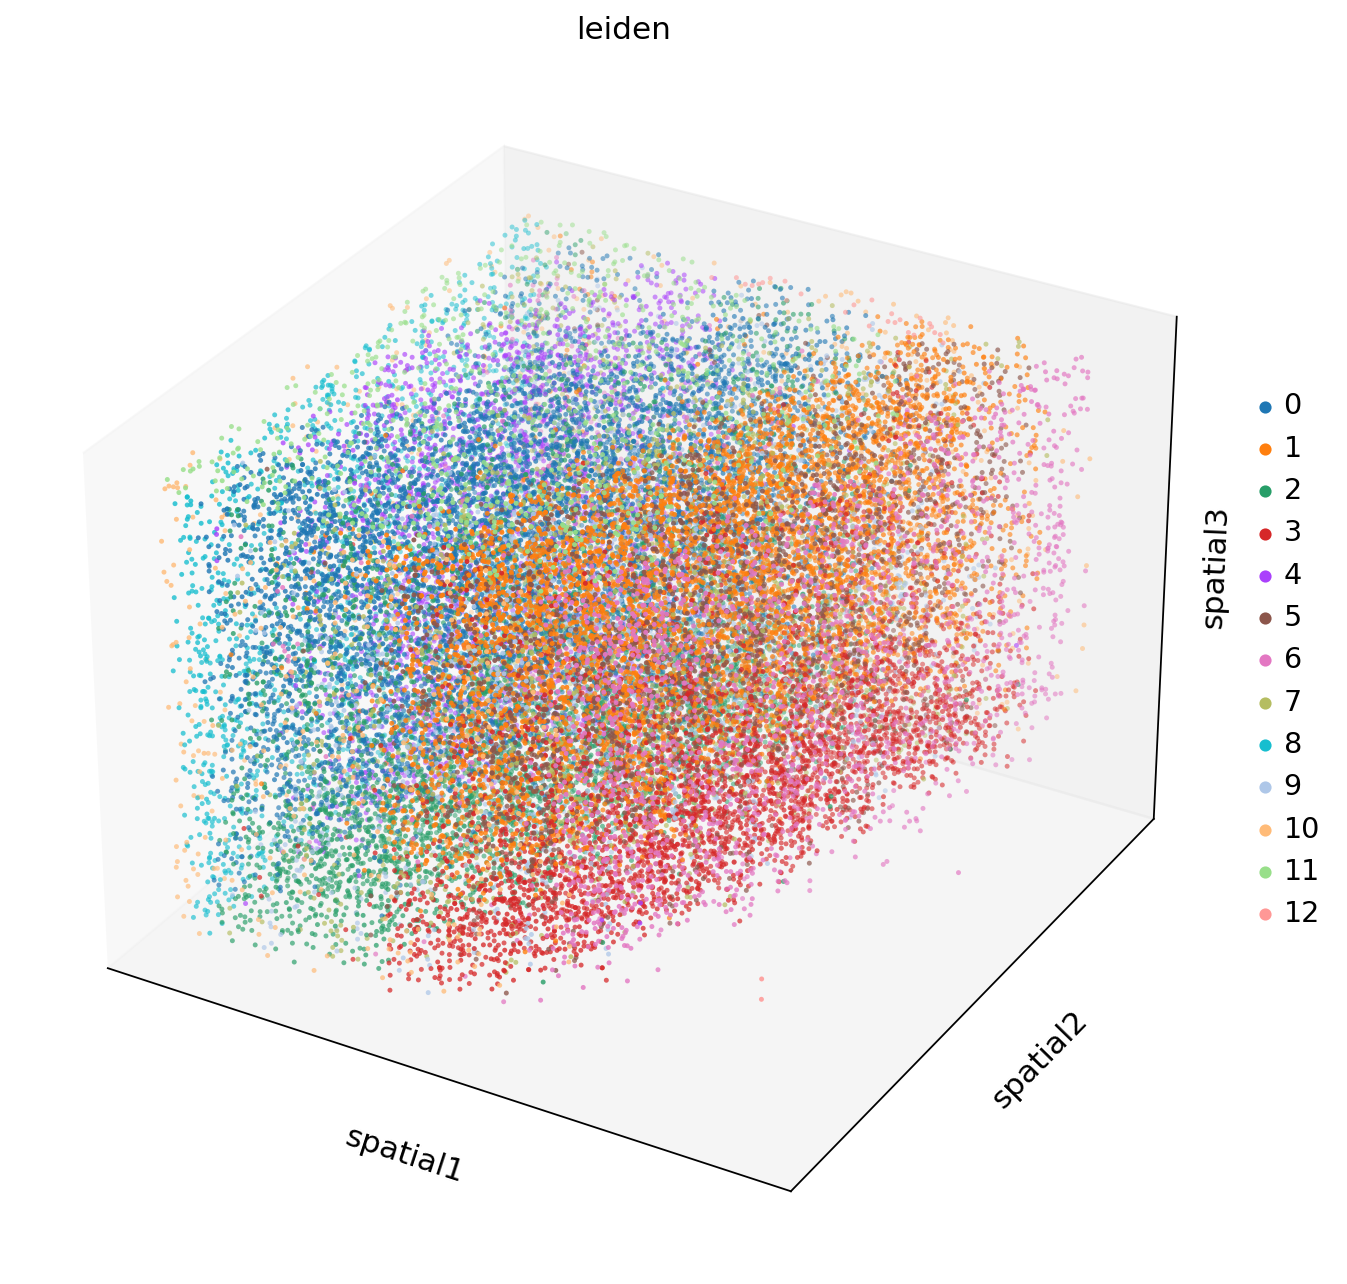

In [19]:
sc.pl.spatial(adata, color="leiden", projection="3d", spot_size=10)

In [29]:
adata.shape

(78329, 649)

In [27]:
counts = pd.read_csv(
    BASE_PATH
    / "datasets_mouse_brain_map_BrainReceptorShowcase_Slice2_Replicate1_cell_by_gene_S2R1.csv",
    index_col=0,
)

In [28]:
metadata = pd.read_csv(
    BASE_PATH
    / "datasets_mouse_brain_map_BrainReceptorShowcase_Slice2_Replicate1_cell_metadata_S2R1.csv",
    index_col=0,
)

In [30]:
np.testing.assert_array_equal(metadata.index.values, counts.index.values)

In [31]:
counts.reset_index(inplace=True, drop=True)
metadata.reset_index(inplace=True, drop=True)

In [32]:
from anndata import AnnData
import scipy

counts = scipy.sparse.csr_matrix(counts.to_numpy())
counts.eliminate_zeros()
adata = AnnData(counts, obs=metadata)

/home/icb/giovanni.palla/miniconda3/envs/spatial/lib/python3.8/site-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [33]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata,)

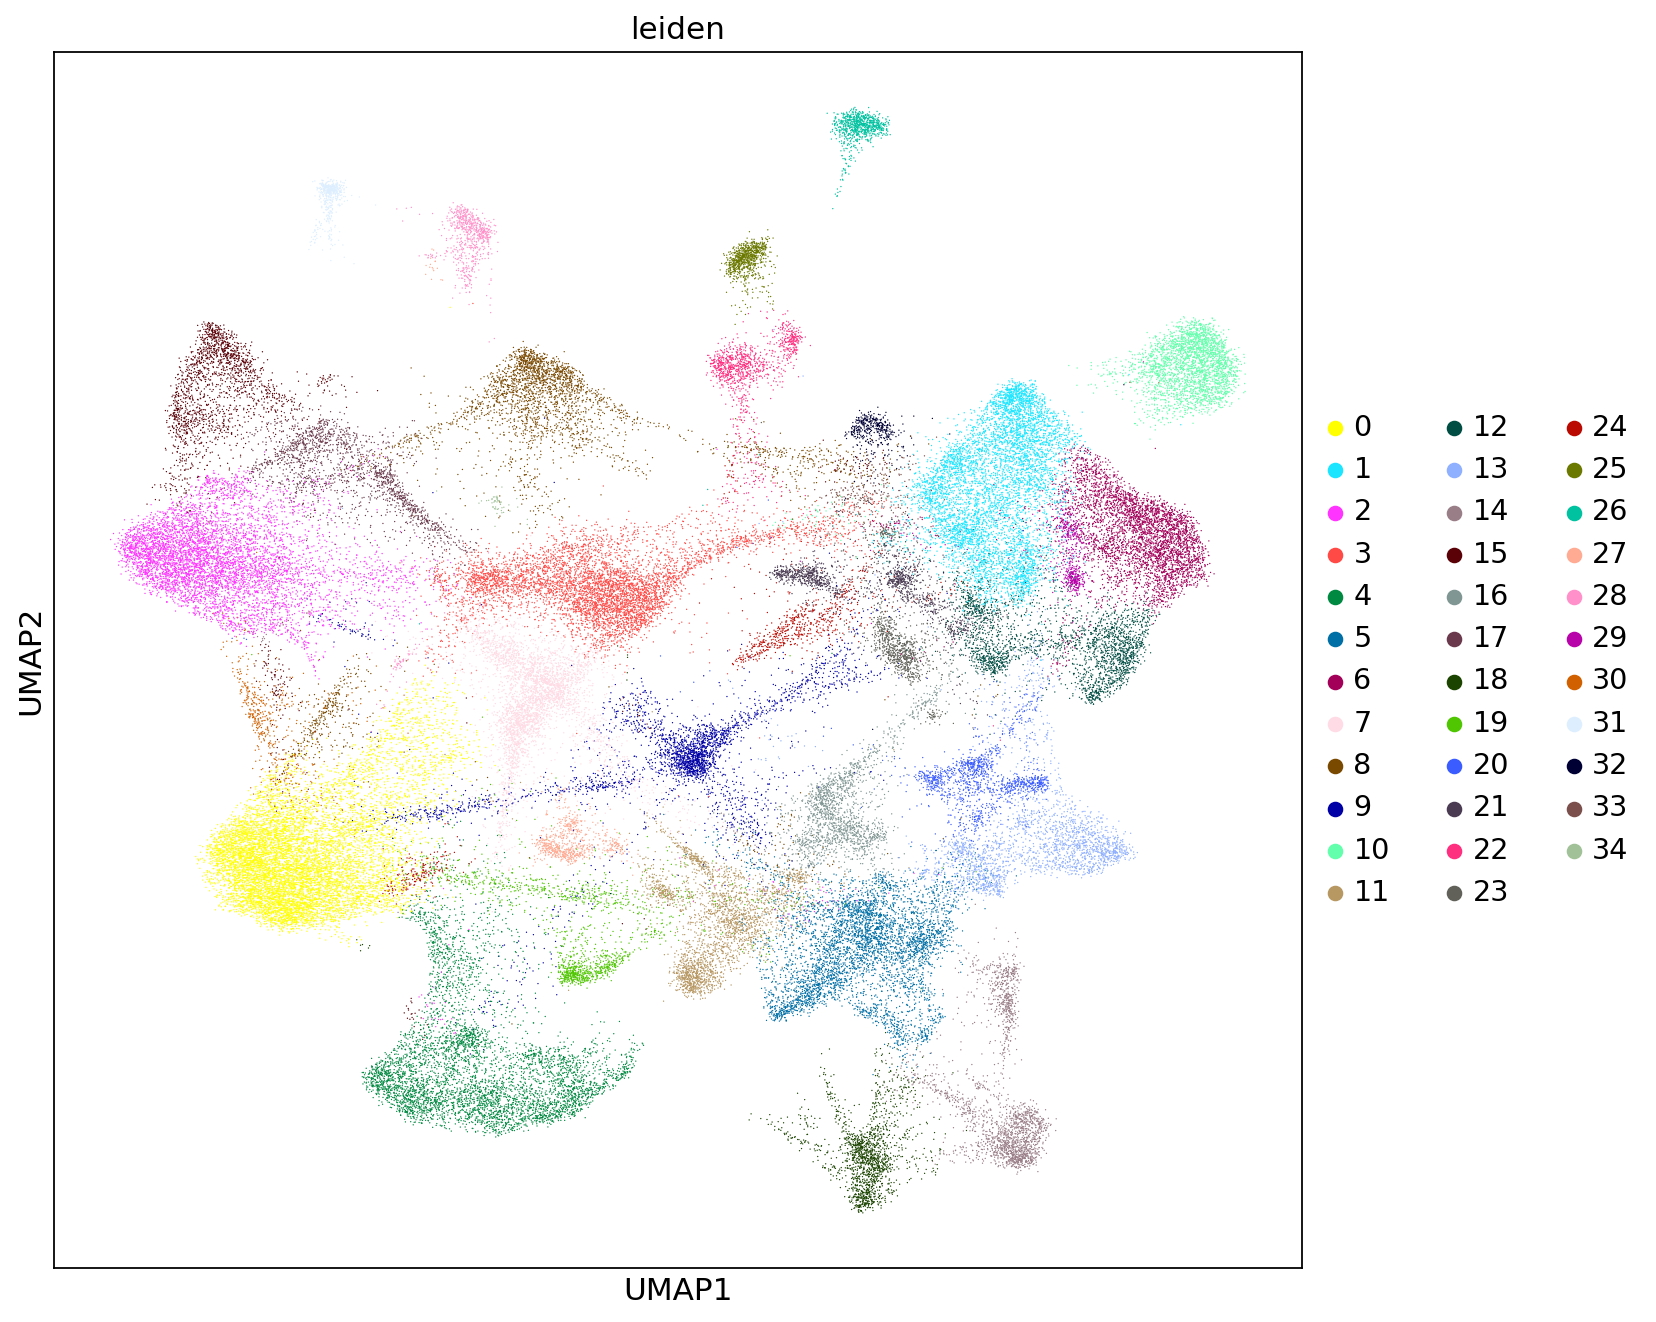

In [34]:
sc.pl.umap(adata, color="leiden")

In [36]:
adata.shape

(83546, 649)

In [37]:
adata.obsm["spatial"] = adata.obs[["center_x", "center_y"]].to_numpy()

In [38]:
sq.gr.spatial_neighbors(adata, coord_type="generic", delaunay=True)

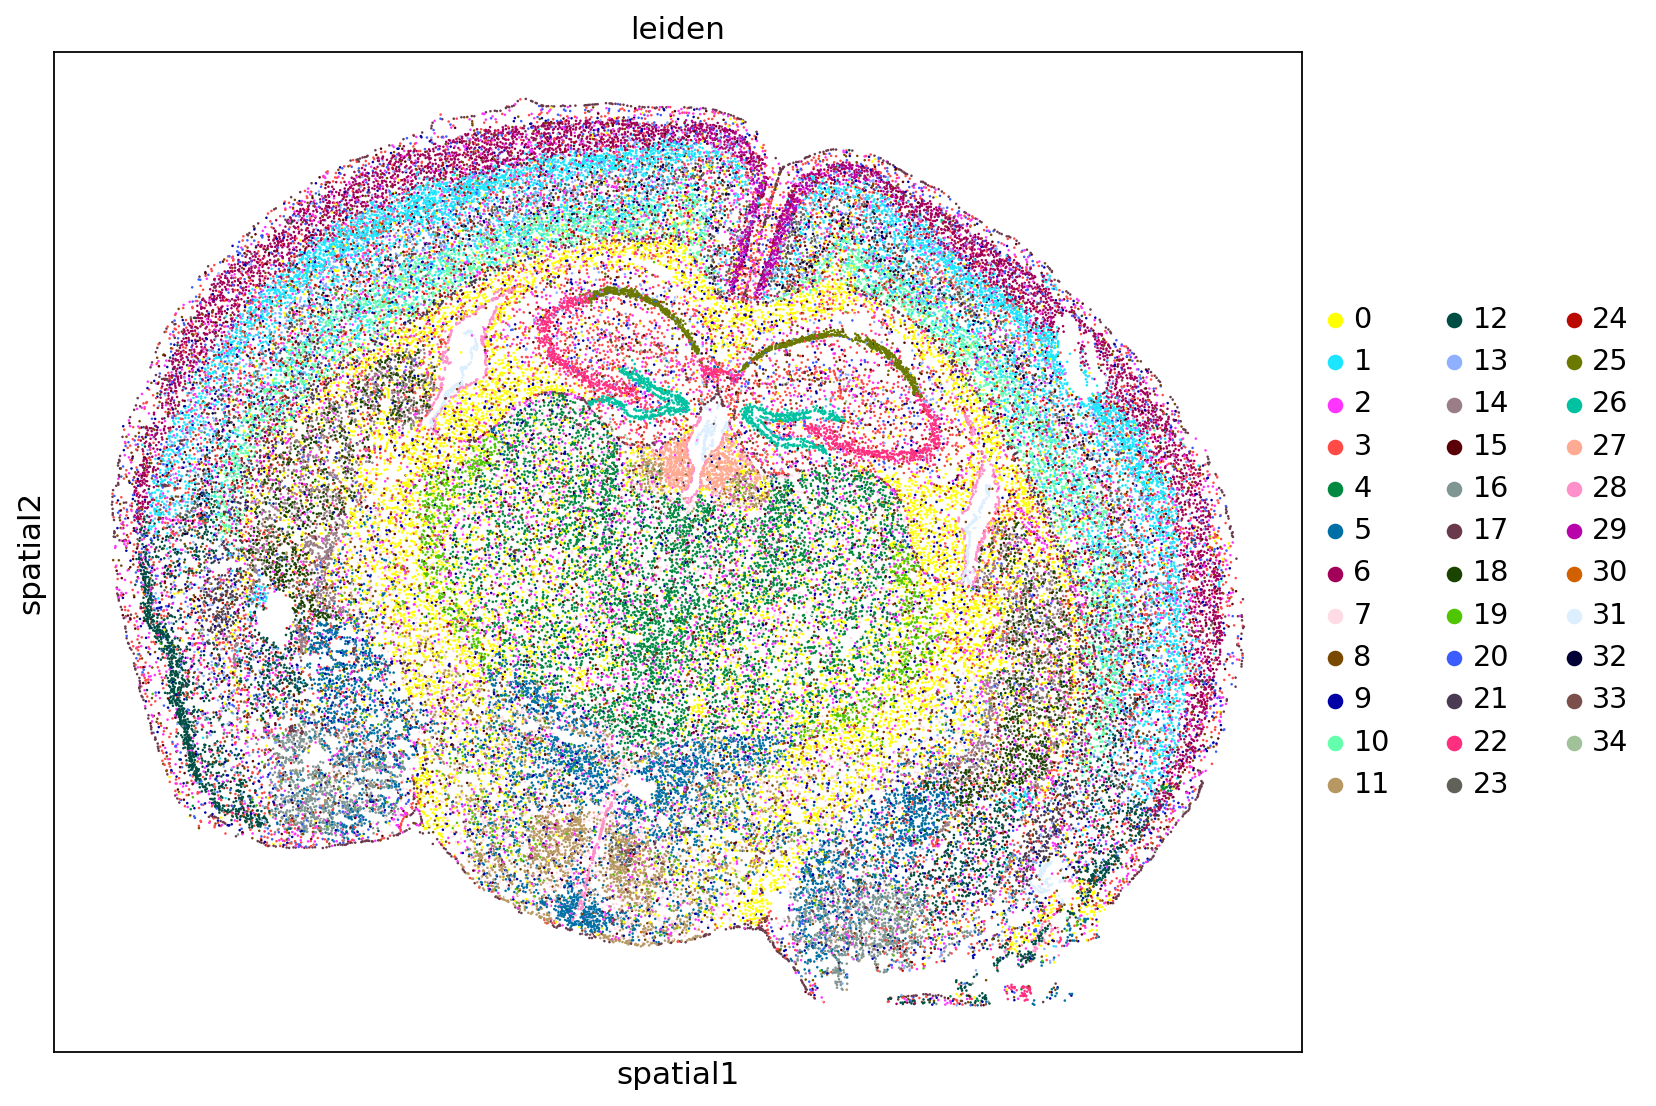

In [39]:
sc.set_figure_params(figsize=(10, 10))
sc.pl.spatial(adata, color="leiden", spot_size=20)

In [41]:
adata.write(
    "/storage/groups/ml01/datasets/raw/20201214_SquidpyData_giovanni.palla/tutorial_data/merfish_vizgen.h5ad"
)